#**Assignment 4**

##Boston Housing Dataset
Predicting Median value of owner-occupied homes.

The aim of this assignment is to learn the application of machine learning algorithms to data sets. This involves learning what data means, how to handle data, training, cross validation, prediction, testing your model, etc.

This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive, and has been used extensively throughout the literature to benchmark algorithms. The data was originally published by Harrison, D. and Rubinfeld, D.L. Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

The dataset is small in size with only 506 cases. It can be used to predict the median value of a home, which is done here. There are 14 attributes in each case of the dataset. They are:


CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

###Aim

--> To implement a linear regression with regularization via gradient descent.

--> to implement gradient descent with Lp norm, for 3 different values of p in (1,2]

--> To contrast the difference between performance of linear regression Lp norm and L2 norm for these 3 different values.

--> Tally that the gradient descent for L2 gives same result as matrix inversion based solution.

All the code is written in a single python file. The python program accepts the data directory path as input where the train and test csv files reside. Note that the data directory will contain two files train.csv used to train your model and test.csv for which the output predictions are to be made. The output predictions get written to a file named output.csv. The output.csv file should have two comma separated columns [ID,Output].

###Working of Code

--> NumPy library would be required, so code begins by importing it

--> Import phi and phi_test from train and test datasets using NumPy's loadtxt function

--> Import y from train dataset using the loadtxt function

--> Concatenate coloumn of 1s to right of phi and phi_test

--> Apply min max scaling on each coloumn of phi and phi_test

--> Apply log scaling on y

--> Define a function to calculate change in error function based on phi, w and p norm
--> Make a dictionary containing filenames as keys and p as values
--> For each item in this dictionary
    --> Set the w to all 0s
    --> Set an appropriate value for lambda and step size
    --> Calculate new value of w
    --> Repeat steps until error between consecutive ws is less than threshold
    --> Load values of id from test data file
    --> Calculate y for test data using phi test and applying inverse log
    --> Save the ids and y according to filename from dictionary
###Feature Engineering
--> Columns of phi are not in same range, this is because their units are different i.e phi is ill conditioned

--> So, min max scaling for each column is applied to bring them in range 0-1

--> Same scaling would be required on columns of phi test

--> Log scaling was used on y. This was determined by trial and error

###Comparison of performance
(p1=1.75, p2=1.5, p3=1.3)

--> As p decreases error in y decreases

--> As p decreases norm of w increases but this can be taken care by increasing 
lambda

--> As p decreases number of iterations required decreases

###Tuning of Hyperparameter
If p is fixed and lambda is increased error decreases up to a certain lambda, then it starts rising

--> So, lambda was tuned by trial and error.

--> Starting with 0, lambda was increased in small steps until a minimum error was achieved.
###Comparison of L2 gradient descent and closed form
--> Error from L2 Gradient descent were 4.43268 and that from closed form solution was 4.52624.

--> Errors are comparable so, the L2 gradient descent performs closely with closed form solution.

##**1. Importing Required Library and Packages**

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [54]:
df = pd.read_csv('https://raw.githubusercontent.com/JOHANDILEEP21/Tasks6/main/Data/train.csv')
df.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       400 non-null    int64  
 1   CRIM     400 non-null    float64
 2   ZN       400 non-null    float64
 3   INDUS    400 non-null    float64
 4   CHAS     400 non-null    int64  
 5   NOX      400 non-null    float64
 6   RM       400 non-null    float64
 7   AGE      400 non-null    float64
 8   DIS      400 non-null    float64
 9   RAD      400 non-null    int64  
 10  TAX      400 non-null    float64
 11  PTRATIO  400 non-null    float64
 12  B        400 non-null    float64
 13  LSTAT    400 non-null    float64
 14  MEDV     400 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 47.0 KB


In [56]:
df.isnull().sum()

ID         0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [57]:
df.shape

(400, 15)

In [58]:
df = df.drop_duplicates()

In [59]:
df.shape

(400, 15)

##The given data is already clean.

##**Encoding**
Already the columns of CHAS are encoded.

##**OUTLIERS EXIST OR NOT and EDA**

In [60]:
x = df.describe().T
x

,count,mean,std,min,25%,50%,75%,max
ID,400.0,199.500000,115.614301,0.00000,99.75000,199.50000,299.250000,399.0000
CRIM,400.0,3.757191,9.155496,0.00906,0.07782,0.24217,3.543427,88.9762
ZN,400.0,10.970000,22.796261,0.00000,0.00000,0.00000,12.500000,95.0000
INDUS,400.0,10.936425,6.848042,0.46000,5.13000,8.56000,18.100000,27.7400
CHAS,400.0,0.072500,0.259639,0.00000,0.00000,0.00000,0.000000,1.0000
NOX,400.0,0.552817,0.115488,0.38500,0.44900,0.53200,0.624000,0.8710
RM,400.0,6.292165,0.709923,4.13800,5.87750,6.20850,6.620500,8.7800
AGE,400.0,68.086000,28.386888,2.90000,42.37500,76.95000,93.825000,100.0000
DIS,400.0,3.819462,2.132445,1.12960,2.10915,3.27210,5.214600,12.1265
RAD,400.0,9.462500,8.687478,1.00000,4.00000,5.00000,24.000000,24.0000


In [61]:
def outlier_presence(df):
  for i in df.keys():
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    x = (df < (Q1 -1.5 *IQR))|(df > (Q3 + 1.5 *IQR))
    substring='True'
    y=x[x.apply(lambda row:row.astype(str).str.contains(substring, case=False).any(), axis=1)]
    if True in y[i].tolist():
      print('Outliers', '\033[1m' + 'present'+'\033[0m' + ' in the data of','\033[1m' + i +'\033[0m')
      print('##############################################')
    else:
      print('Outliers', '\033[1m' + ' not present in the data of '+'\033[0m' + 'in','\033[1m' + i +'\033[0m')
      print('##############################################')
outlier_presence(df)

Outliers  not present in the data of in ID
##############################################
Outliers present in the data of CRIM
##############################################
Outliers present in the data of ZN
##############################################
Outliers  not present in the data of in INDUS
##############################################
Outliers present in the data of CHAS
##############################################
Outliers  not present in the data of in NOX
##############################################
Outliers present in the data of RM
##############################################
Outliers  not present in the data of in AGE
##############################################
Outliers present in the data of DIS
##############################################
Outliers  not present in the data of in RAD
##############################################
Outliers  not present in the data of in TAX
##############################################
Outliers present in the data of PTRATI

In [62]:
def lowerupper(df):
  for i in df.keys():
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower = Q1 -(whisker_width *IQR)
    upper = Q3 +(whisker_width * IQR)
    print('\033[1m'+ i +'\033[0m')
    print('##################################\n')
    print("Lower whisker: ", lower)
    print("Upper whisker: ", upper)
    print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@\n")

lowerupper(df)

ID
##################################

Lower whisker:  -199.5
Upper whisker:  598.5
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

CRIM
##################################

Lower whisker:  -5.1205912499999995
Upper whisker:  8.74183875
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

ZN
##################################

Lower whisker:  -18.75
Upper whisker:  31.25
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

INDUS
##################################

Lower whisker:  -14.325000000000006
Upper whisker:  37.55500000000001
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

CHAS
##################################

Lower whisker:  0.0
Upper whisker:  0.0
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

NOX
##################################

Lower whisker:  0.18650000000000005
Upper whisker:  0.8865
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

RM
##################################

Lower whisker:  4.763000000000002
Upper whisker:  7.734999999999999
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

AGE
##########

In [63]:
for k, v in df.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
  print('Column %s outliers = %.2f%%' % (k, perc))

Column ID outliers = 0.00%
Column CRIM outliers = 13.25%
Column ZN outliers = 13.00%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 6.25%
Column AGE outliers = 0.00%
Column DIS outliers = 1.25%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 3.25%
Column B outliers = 14.50%
Column LSTAT outliers = 1.50%
Column MEDV outliers = 8.00%


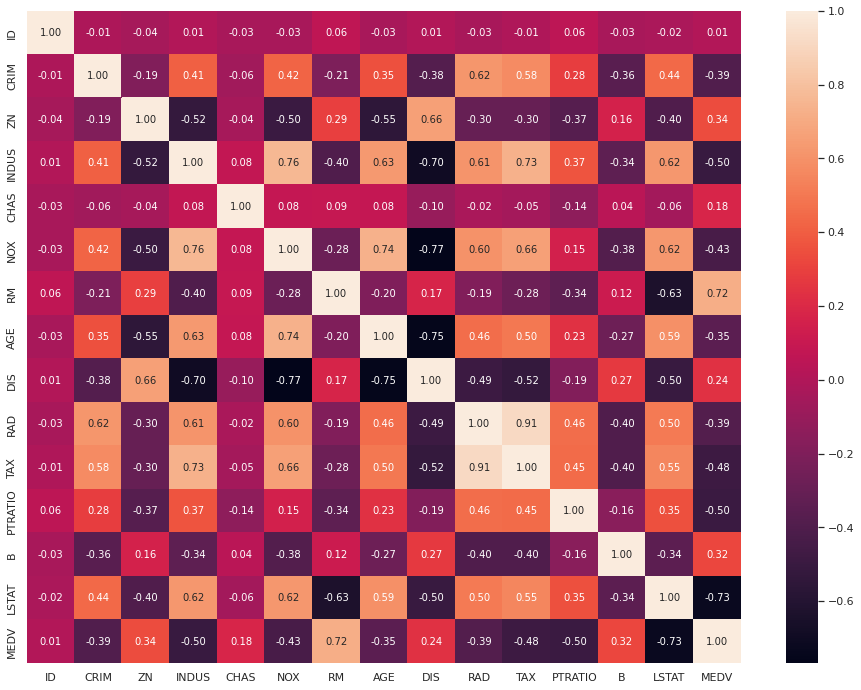

In [64]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
#plt.savefig('Features_correlation.png')

In [65]:
sns.set_theme()

###From the correlation plot we can see greater POSITIVE correlation in the order RM < ZN < B < DIS < CHS_1

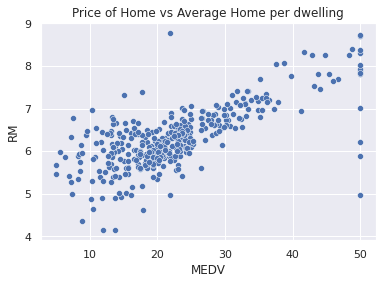

In [66]:
plt.title('Price of Home vs Average Home per dwelling')
sns.scatterplot(data=df, x=df['MEDV'], y=df['RM'])
plt.show()

In [67]:
df[['MEDV', 'RM']].corr()

,MEDV,RM
MEDV,1.000000,0.721489
RM,0.721489,1.000000


**We've got a good Linear Relationship and Correlation**

we can see for other main factors also

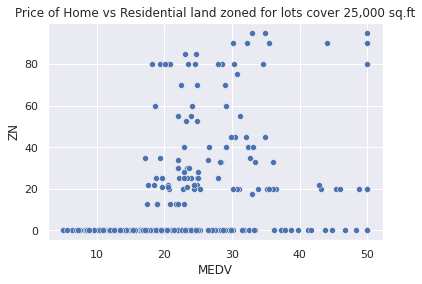

In [68]:
plt.title('Price of Home vs Residential land zoned for lots cover 25,000 sq.ft')
sns.scatterplot(data=df, x=df['MEDV'], y=df['ZN'])
plt.show()

In [69]:
df[['MEDV','ZN']].corr()

,MEDV,ZN
MEDV,1.000000,0.336805
ZN,0.336805,1.000000


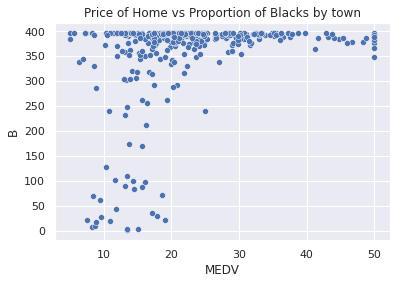

,MEDV,B
MEDV,1.00000,0.31791
B,0.31791,1.00000


In [70]:
plt.title('Price of Home vs Proportion of Blacks by town')
sns.scatterplot(data=df, x=df['MEDV'],y=df['B'])
plt.show()
df[['MEDV', 'B']].corr()

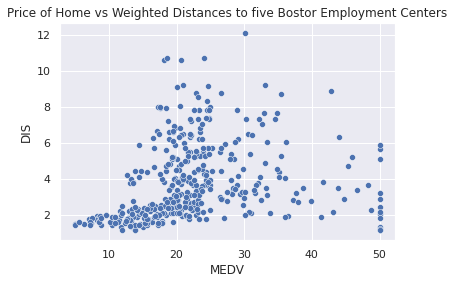

,MEDV,DIS
MEDV,1.000000,0.235087
DIS,0.235087,1.000000


In [71]:
plt.title('Price of Home vs Weighted Distances to five Bostor Employment Centers')
sns.scatterplot(data=df, x=df['MEDV'], y=df['DIS'])
plt.show()
df[['MEDV', 'DIS']].corr()

We can see Negetive Correlation also

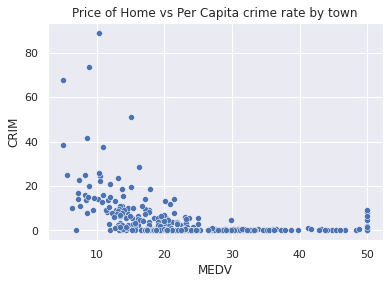

,MEDV,CRIM
MEDV,1.000000,-0.393693
CRIM,-0.393693,1.000000


In [72]:
plt.title('Price of Home vs Per Capita crime rate by town')
sns.scatterplot(data=df, x=df['MEDV'], y=df['CRIM'])
plt.show()
df[['MEDV','CRIM']].corr()

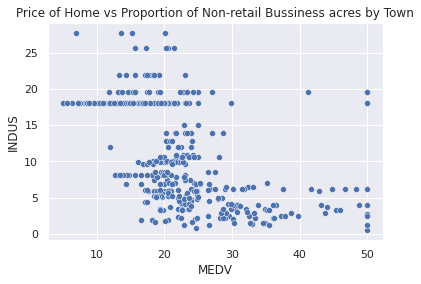

,MEDV,INDUS
MEDV,1.000000,-0.502898
INDUS,-0.502898,1.000000


In [73]:
plt.title('Price of Home vs Proportion of Non-retail Bussiness acres by Town')
sns.scatterplot(data=df, x=df['MEDV'], y=df['INDUS'])
plt.show()
df[['MEDV', 'INDUS']].corr()

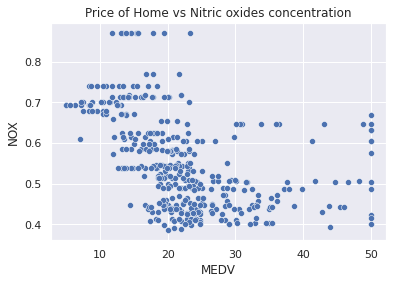

,MEDV,NOX
MEDV,1.000000,-0.434271
NOX,-0.434271,1.000000


In [74]:
plt.title("Price of Home vs Nitric oxides concentration")
sns.scatterplot(data=df, x=df['MEDV'], y=df['NOX'])
plt.show()
df[['MEDV', 'NOX']].corr()

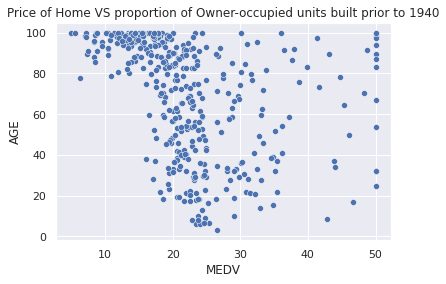

,MEDV,AGE
MEDV,1.000000,-0.354106
AGE,-0.354106,1.000000


In [75]:
plt.title('Price of Home VS proportion of Owner-occupied units built prior to 1940')
sns.scatterplot(data=df, x=df['MEDV'], y=df['AGE'])
plt.show()
df[['MEDV','AGE']].corr()

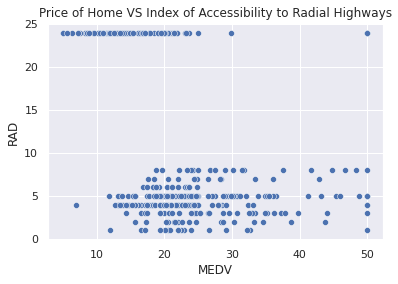

,MEDV,RAD
MEDV,1.000000,-0.386922
RAD,-0.386922,1.000000


In [76]:
plt.title('Price of Home VS Index of Accessibility to Radial Highways')
sns.scatterplot(data=df, x=df['MEDV'], y=df['RAD'])
plt.show()
df[['MEDV','RAD']].corr()

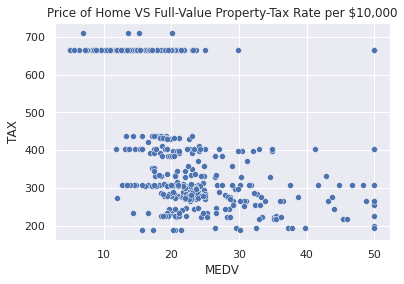

,MEDV,TAX
MEDV,1.000000,-0.479308
TAX,-0.479308,1.000000


In [77]:
plt.title('Price of Home VS Full-Value Property-Tax Rate per \$10,000')
sns.scatterplot(data=df, x=df['MEDV'], y=df['TAX'])
plt.show()
df[['MEDV','TAX']].corr()

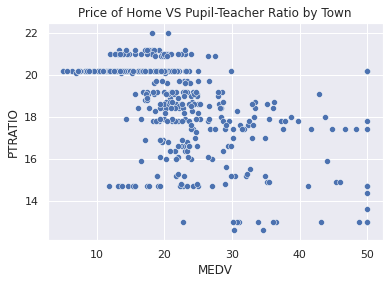

,MEDV,PTRATIO
MEDV,1.000000,-0.495904
PTRATIO,-0.495904,1.000000


In [78]:
plt.title('Price of Home VS Pupil-Teacher Ratio by Town')
sns.scatterplot(data=df, x=df['MEDV'], y=df['PTRATIO'])
plt.show()
df[['MEDV','PTRATIO']].corr()

###**Splitting of Data**

In [98]:
df = pd.read_csv('https://raw.githubusercontent.com/JOHANDILEEP21/Tasks6/main/Data/train.csv')
df.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8


In [99]:
b=[]
for i in df.keys():
  b.append(i)
print(b)

['ID', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


###**We don't want 'MEDV' and 'ID' in the feature set b, we newly defined from the dummies**

In [100]:
b.remove('ID')
b.remove('MEDV')
print(b)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


###**Now we are taking the feature set as b**

In [101]:
X = df[b].values
y=df['MEDV'].values

##Model Training

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train, y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [104]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [105]:
regressor.intercept_

22.824375000000025

In [106]:
coeff_df = pd.DataFrame(regressor.coef_, [b], columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.890760
ZN,0.856409
INDUS,-0.080591
CHAS,0.866069
NOX,-2.118463
RM,3.099368
AGE,0.008133
DIS,-2.953137
RAD,2.720346
TAX,-2.261846


In [109]:
y_pred = regressor.predict(X_test_scaled)
print(y_pred)

[13.6693765  19.95899205 24.84532881 26.02779473 19.55934583 23.05863669
 23.26033434 13.85955083 22.14356845 18.05511774 31.98639236 22.79226541
 38.87055984 22.35835412 22.97612654 23.50943965 21.08853606 16.21021809
 22.9290802  31.14624403 23.26738248 13.73844171 25.98112972 25.84530626
 32.74545173 24.90319794 24.34607324 10.66390987 27.52040251 20.85014271
 18.29452628 17.11405755 24.55918521 24.19637341 23.45473985 24.92899963
 24.94147845 17.04910812 21.51786957 28.9582054  28.022454   24.9600842
 14.93679211 28.51696658  7.56278531 20.73488734 23.27288227 17.74408874
 22.19736005 30.91186374 15.99548172 22.64634981 22.67983312 28.91909404
 17.28934571 23.2878774  20.06423087 41.58690182 19.82481793 17.79847501
 28.13354487 17.13784569 21.91373217 28.51630621 20.42290114 19.21725804
 22.22006113 16.12836918 24.01812773 14.97590888 15.53011443 15.32272934
 18.6464185  30.8024034  14.18606553 34.30066326 15.51249456 13.06626886
 21.16743837 20.52172074]


In [111]:
from sklearn import metrics
print('R^2:',metrics.r2_score(y_test, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.730168884117644
Adjusted R^2: 0.7187054706978053
MAE: 2.6651866387853387
MSE: 11.386474667728377
RMSE: 3.3743850799409922


###𝑅^2 : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.

###Adjusted 𝑅^2 :The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.

###MAE : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y. 

###MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

###RMSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

In [114]:
df = pd.DataFrame({'Actual': y_test, 'Predict':y_pred})
df

,Actual,Predict
0,13.3,13.669376
1,19.9,19.958992
2,23.1,24.845329
3,22.2,26.027795
4,18.9,19.559346
...,...,...
75,26.7,34.300663
76,17.4,15.512495
77,15.6,13.066269
78,21.0,21.167438


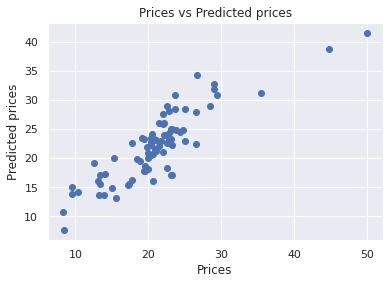

In [116]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

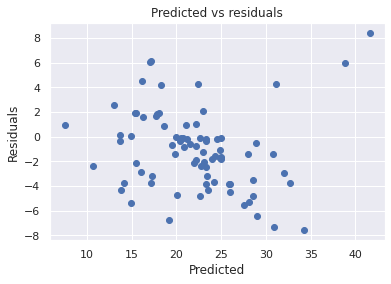

In [118]:
# Checking residuals
plt.scatter(y_pred,y_test-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

###There is no pattern visible in this plot and values are distributed equally around zero. So Linearily assumption is satisfied

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


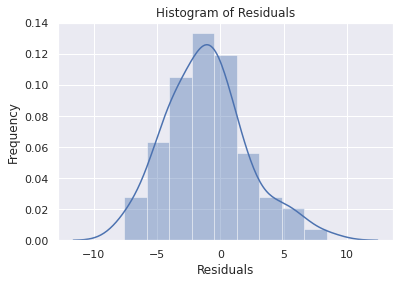

In [120]:
# Checking Normality of errors
sns.distplot(y_test-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

**Here the residuals are normally distributed. So normality assumption is satisfied**

In [121]:
from sklearn import metrics
print('R^2 Score: ', metrics.r2_score(y_test, y_pred))

R^2 Score:  0.730168884117644


###Here we've got an 73% accuracy of R^2 value.

#**Lasso Regression**

In [122]:
L=Lasso()
L.fit(X_train,y_train)
y_pred_lasso = L.predict(X_test)
y_pred_lasso

array([13.61327855, 18.93477703, 26.22064482, 26.27290081, 21.02238462,
       24.70541187, 24.51034996, 11.55000214, 23.48566981, 20.06178756,
       31.01122852, 24.94980263, 34.39969964, 24.11137396, 21.98731614,
       24.25597378, 22.42077114, 16.11581115, 24.2295699 , 31.98505389,
       23.68626978, 16.43948881, 22.17768211, 27.28002346, 28.60485407,
       25.98803331, 24.8746726 ,  9.90290839, 27.45541779, 20.8321027 ,
       18.30131816, 17.28842437, 20.87854633, 26.30646114, 25.23366059,
       26.87076686, 27.43806617, 16.65869657, 24.49712836, 30.20608278,
       27.82402556, 30.38874901, 18.27523372, 28.91529638,  7.71341298,
       21.29698214, 24.80926261, 19.11201523, 22.29548337, 30.34698215,
       13.69426755, 20.43177968, 22.90970082, 27.72755667, 18.10245102,
       22.18162307, 24.69892222, 36.20574786, 21.14597317, 19.92444547,
       30.8338033 , 16.39054849, 21.94133836, 28.460649  , 22.08582257,
       18.01994409, 20.60880087, 22.51705809, 27.03203145, 15.46

In [123]:
print(mean_squared_error(y_test, y_pred_lasso)**0.5)

3.988938231696938


In [124]:
print(mean_absolute_error(y_test,y_pred_lasso)**0.5)

1.7398483778270715


In [125]:
df2 = pd.DataFrame({'Actual': y_test, 'Lasso_Predict': y_pred_lasso})
df2

,Actual,Lasso_Predict
0,13.3,13.613279
1,19.9,18.934777
2,23.1,26.220645
3,22.2,26.272901
4,18.9,21.022385
...,...,...
75,26.7,28.944984
76,17.4,16.595445
77,15.6,15.032116
78,21.0,21.876062


In [126]:
from sklearn import metrics 
print('R2- SCORE with Lasso Regression:', metrics.r2_score(y_test,y_pred_lasso))

R2- SCORE with Lasso Regression: 0.6229340052653709


#**Ridge Regression**

In [127]:
R=Ridge()
R.fit(X_train,y_train)
y_pred_ridge = R.predict(X_test)
y_pred_ridge

array([13.62304482, 19.43575773, 25.02774532, 25.67135932, 19.40212281,
       23.27604012, 23.10296462, 13.55950044, 21.81374426, 18.78893736,
       31.89387632, 23.01407196, 38.55062283, 23.04258779, 24.08855153,
       23.26528743, 20.94523238, 16.23548851, 23.3358609 , 31.62423492,
       22.70189955, 13.91763238, 25.29267334, 26.29442875, 32.43200113,
       25.09389373, 24.09598886, 10.31662641, 27.1579323 , 20.59878201,
       17.83641281, 17.54966348, 24.15347069, 23.93012415, 23.47669356,
       25.30479658, 25.37865836, 17.60075237, 21.63475767, 28.77655286,
       27.81150348, 26.96418355, 14.12181771, 28.19105559,  7.7111874 ,
       20.58531329, 23.22334773, 17.37153201, 21.57049434, 30.70374484,
       15.91451076, 23.17903234, 22.70642005, 28.48716796, 17.78520012,
       22.50050569, 21.9025195 , 41.640837  , 20.10649403, 18.03526694,
       28.76600053, 17.31232124, 21.84342256, 28.39372496, 20.5303178 ,
       19.42359906, 21.78268905, 17.25946444, 24.19183017, 15.39

In [128]:
print(mean_squared_error(y_test, y_pred_ridge)**0.5)

3.3913214900120443


In [129]:
print(mean_absolute_error(y_test, y_pred_ridge)**0.5)

1.6442118906594794


In [130]:
df3 = pd.DataFrame({'Actual':y_test, 'Predicted_Ridge':y_pred_ridge})
df3

,Actual,Predicted_Ridge
0,13.3,13.623045
1,19.9,19.435758
2,23.1,25.027745
3,22.2,25.671359
4,18.9,19.402123
...,...,...
75,26.7,33.704569
76,17.4,15.626825
77,15.6,13.077176
78,21.0,21.484072


In [131]:
print("R^2 score of Ridge: ", metrics.r2_score(y_test, y_pred_ridge))

R^2 score of Ridge:  0.7274534625446867


###Difference between L1 norm and L2 norms

In [132]:
dif = pd.DataFrame({'L1 Norms': y_pred_lasso, 'L2 Norms': y_pred_ridge})
dif

,L1 Norms,L2 Norms
0,13.613279,13.623045
1,18.934777,19.435758
2,26.220645,25.027745
3,26.272901,25.671359
4,21.022385,19.402123
...,...,...
75,28.944984,33.704569
76,16.595445,15.626825
77,15.032116,13.077176
78,21.876062,21.484072


##**Feature Selection**

---

It'll show the most important feature with ranking.

In [133]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector.fit(X_train_scaled, y_train)
sorted(list(zip(selector.ranking_, b)))

[(1, 'DIS'),
 (1, 'LSTAT'),
 (1, 'RM'),
 (2, 'NOX'),
 (3, 'PTRATIO'),
 (4, 'RAD'),
 (5, 'TAX'),
 (6, 'CRIM'),
 (7, 'ZN'),
 (8, 'CHAS'),
 (9, 'B'),
 (10, 'INDUS'),
 (11, 'AGE')]

##**Upload Test Dataset**

In [134]:
df1 = pd.read_csv('https://raw.githubusercontent.com/JOHANDILEEP21/Tasks6/main/Data/test.csv')
df1.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,394.62,12.40
1,1,0.34109,0.0,7.38,0,0.493,6.415,40.1,4.7211,5,287.0,19.6,396.90,6.12
2,2,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69
3,3,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45
4,4,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403.0,14.7,227.61,12.14


###In this test file, we don't have the 'MEDV' column, so we want to predict the value from our trained model.

Remove 'ID' column. The "CHAS" column also encoded.

In [135]:
c = []
for i in df1.keys():
  c.append(i)
print(c)

['ID', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [136]:
c.remove('ID')

###Now take the feature value as the given data.

In [137]:
X = df1[c].values

In [138]:
print(X)

[[1.06120e-01 3.00000e+01 4.93000e+00 ... 1.66000e+01 3.94620e+02
  1.24000e+01]
 [3.41090e-01 0.00000e+00 7.38000e+00 ... 1.96000e+01 3.96900e+02
  6.12000e+00]
 [1.22472e+01 0.00000e+00 1.81000e+01 ... 2.02000e+01 2.46500e+01
  1.56900e+01]
 ...
 [5.36000e-02 2.10000e+01 5.64000e+00 ... 1.68000e+01 3.96900e+02
  5.28000e+00]
 [1.04690e-01 4.00000e+01 6.41000e+00 ... 1.76000e+01 3.89250e+02
  6.05000e+00]
 [4.55587e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.54700e+02
  7.12000e+00]]


In [139]:
x_test_scale = scaler.transform(X)

###In the next step our trained Regressor. We predict new value of target variable "MEDV".

In [140]:
y_testpred = regressor.predict(x_test_scale)

In [141]:
print(y_testpred)

[24.05635779 25.07320697 16.55316172 19.96597037 23.02856814 22.59750665
 18.60463565 22.45214637 33.78195372 19.24244035 25.83867831 22.9445385
 20.56809376 18.26914307 20.51459811 27.16290718 17.43803047 24.61345966
 19.34793535 21.85643527 26.28825308 37.04694116 23.6984889   9.73112402
 14.28690792  9.92108808 17.1237396  20.39555714 23.89059225 15.17765384
 37.00677341 18.85520021 18.59151883 18.87677215 26.75521228 20.1558236
 30.84543515 30.78670534 39.50854621 25.05350741 19.41954237 32.4300976
 25.06686798 17.80178342 22.25169926 26.57737339 20.36847617 24.35585286
 14.70930946 13.64365983 19.65467731 33.97615227 25.38998104 -3.42166233
 12.84466528 16.33515585 20.73916134 13.13353396 10.77932669 18.5218214
 19.98239011 20.37521169 32.86023983 24.52912821 36.32201247 32.83819368
 15.96370867 21.52264667 25.53564246 16.83599629 19.79202138 17.17441216
 28.98640103 14.87571694 20.70325739 17.09218614 20.31444214 32.08268267
 17.71866558 33.49542065 32.9131133  42.00358318 28.545

###**Now we add a new predicted value to our DataFrame**

In [142]:
df1['output'] = y_testpred

In [143]:
df1.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,output
0,0,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,394.62,12.40,24.056358
1,1,0.34109,0.0,7.38,0,0.493,6.415,40.1,4.7211,5,287.0,19.6,396.90,6.12,25.073207
2,2,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69,16.553162
3,3,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45,19.965970
4,4,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403.0,14.7,227.61,12.14,23.028568


##**Save the CSV file as output.csv**

In [144]:
df1 = df1[['ID','output']]

In [145]:
df1

,ID,output
0,0,24.056358
1,1,25.073207
2,2,16.553162
3,3,19.965970
4,4,23.028568
...,...,...
100,100,24.253542
101,101,16.748683
102,102,27.758636
103,103,36.433699


In [146]:
df1.to_csv('Output.csv', index=False)

#**The output.csv file in the folder :)**

#**Gradient Descent**

In [148]:
X=df1["ID"]
y=df1["output"]

In [149]:
#cost function 
def single_point_cost(x,y,w):   
    y_pred= w * x
    cost=( y_pred - y) **2  #linear regression
    return cost
#calculating derivative of each point
#grad function
def grad(x,y,w,):
    grad_w=2 * x * ((w * x) - y ) # derevative with respect to x
    return grad_w

In [150]:
w=0 # here we have  only one parameter
gamma=0.000001 #learning rate
all_costs=[]
for k in range(60):
    cost=0
    for i in range(len(X)):
        a=single_point_cost(X[i],y[i],w)
        cost+=a
    
    cost1=cost/len(X)  #average cost
    all_costs.append(cost1)
    grad_w=0
    for j in range(len(X)):
        b=grad(X[j],y[j],w)
        grad_w+=b
    grad_w1=grad_w/len(X)  #avearge grad
    w= w -  (gamma * grad_w1)  # in batch gradient descent update happens only one time

optimal value w is  0.11410879629461801


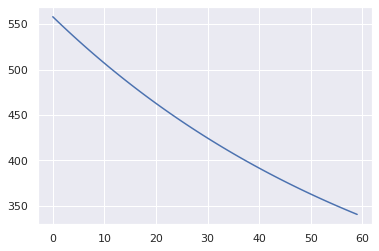

In [151]:
print("optimal value w is ",w) #optimal value of w
epochs=np.arange(60)
plt.plot(epochs,all_costs)

optimal value w is  0.29981108882058694


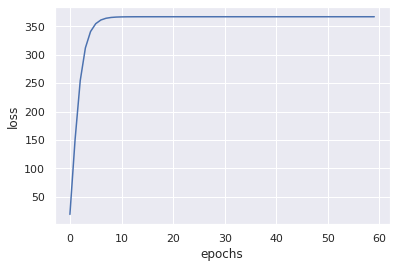

In [152]:
all_costs23=[]
w=0
gamma=0.000001
for k in range(60):
    for i in range(len(X)):
        cost21=single_point_cost(X[i],y[i],w)
        grad_w21=grad(X[i],y[i],w)
        w= w- (gamma * grad_w21) # in sgd update takes place after every point
    all_costs23.append(cost21)

print("optimal value w is ",w) #optimal value of w
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs,all_costs23)

optimal value w is  0.22751410064164168


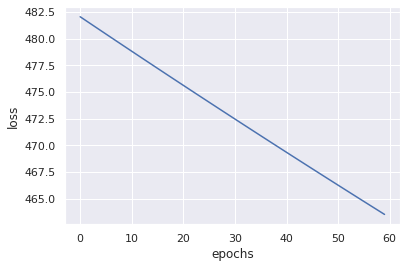

In [153]:
# let our batch size = 5
#so we will have 2 batches because n=10  and updates will happen 2 times 
w=0
gamma=0.000001
batch_size= 5
all_costs41=[]
for k in range(60):
    for j in range(int(len(X)/batch_size)):
        cost4=0
        for i in range(batch_size):
            z1=single_point_cost(X[i],y[i],w)
            cost4+=z1
        if j==1:
            all_costs41.append(cost4/batch_size) #avearge cost of that batch
        grad_w41=0
        for n in range(batch_size):
            f1=grad(X[i],y[i],w)
            grad_w41+=f1
    
        grad_w42=grad_w41/batch_size  #average grad of that function

        w= w- (gamma * grad_w42)  # update takes place after every batch

print("optimal value w is ",w) #optimal value of w
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs,all_costs41)

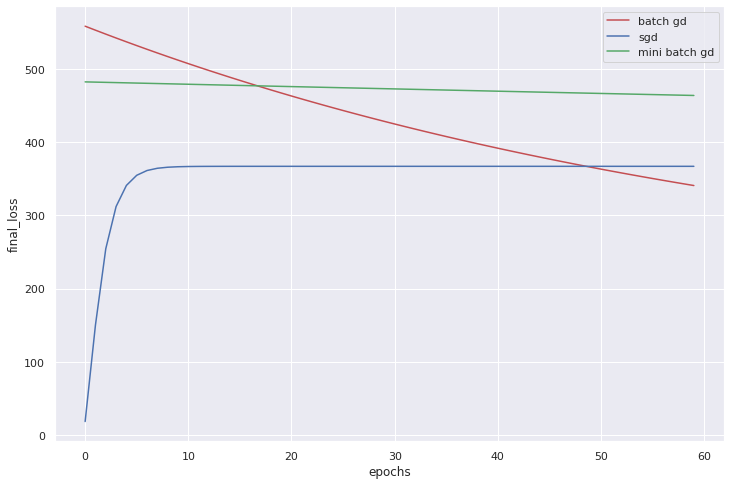

In [154]:
plt.figure(figsize=(12,8))
plt.plot(epochs,all_costs,c='r',label="batch gd")
plt.plot(epochs,all_costs23,c='b',label="sgd")
plt.plot(epochs,all_costs41,c='g',label="mini batch gd")
plt.xlabel("epochs")
plt.ylabel("final_loss")
plt.legend()
plt.show()